# Exploration of the Dynamic Solow Model

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from solowModel import SolowModel

### Setting initial Parameters

In [49]:
# Separate parameters
np.random.seed(42)
t0 = 1
t_end = 5e4

In [151]:
# Characteristic timescales tau_h << tau_s << tau_y << 1/epsilon
tau_h =  1 / 0.04
tau_s =  1 / 0.004
tau_y =  1 / 0.0005
tech_rate = 0.00005
pop_growth = 0#np.log(1.005) / tau_y # USA is about 0.5% per year

In [171]:
# Household
hh_kwargs = {'savings_rate': 0.15, 'static': True}

In [8]:
# Firms
firm_kwargs = {'prod_func': 'cobb-douglas', 'parameters': {'rho': 1 / 3, 'tau_y': tau_y}}

In [264]:
# Capital Markets
capital_kwargs = {
    'static': False, 'depreciation': 0.4, 'pop_growth': pop_growth,
    'dynamic_kwargs': {
        'tau_s': tau_s, 'beta1': 1.1, 'beta2': 1.0, 
        'tau_h': tau_h, 'gamma': 2000, 
        'c1': 1, 'c2': 0.00015, 'c3': 2e-5, 'c4':0
        }
    }   

In [251]:
# News Process
ou_kwargs = {'decay': 0.2, 'drift': 0, 'diffusion': 2.5, 't0': t0}

---
## General case

In [262]:
# production, ks, kd, sentiment, information, tech, consumption
initial_values = {
    'y':1, 'ks':1, 'kd':0, 's':0, 'h':0, 'tech':1
}

sm = SolowModel(hh_kwargs=hh_kwargs,
                firm_kwargs=firm_kwargs,
                capital_kwargs=capital_kwargs,
                tech_rate=tech_rate,
                ou_kwargs=ou_kwargs,
                clearing_form='min',
                v_excess = False)

path = sm.solve(initial_values,t0=t0,t_end=t_end)

Successful: The solver successfully reached the end of the integration interval.


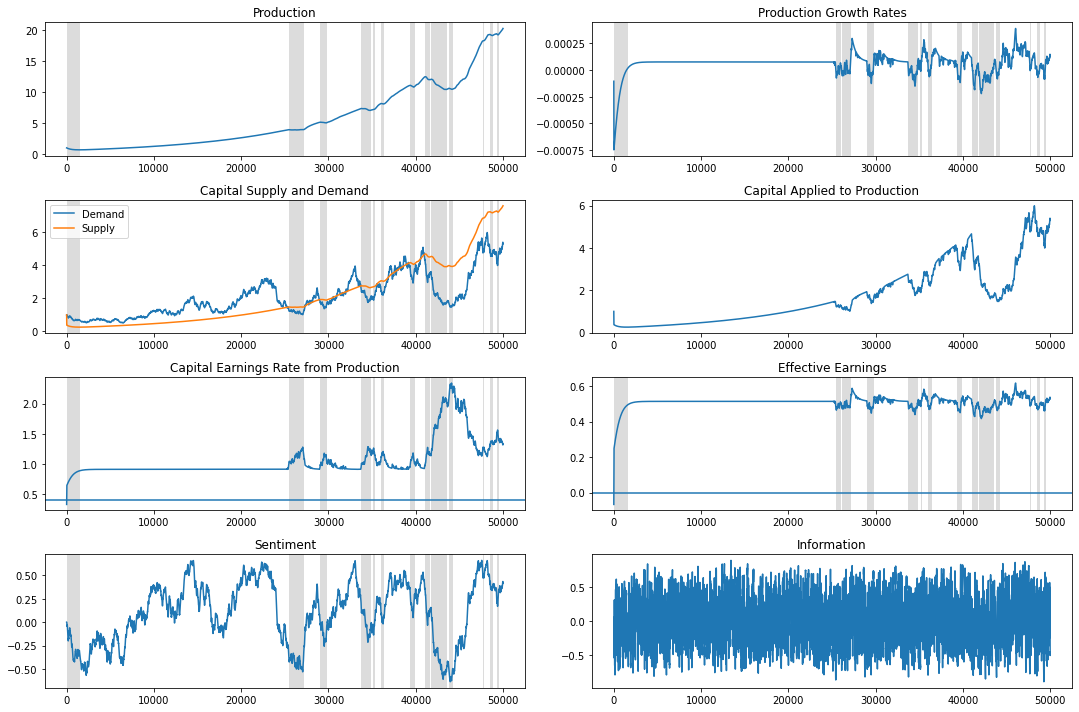

In [279]:
sm.visualise(save = 'solow_draft.png')

In [199]:
# production, ks, kd, sentiment, information, tech, consumption
initial_values = {
    'y':1, 'ks':1, 'kd':0, 's':0, 'h':0, 'tech':1
}

sm_k = SolowModel(hh_kwargs=hh_kwargs,
                firm_kwargs=firm_kwargs,
                capital_kwargs=capital_kwargs,
                tech_rate=tech_rate,
                ou_kwargs=ou_kwargs,
                clearing_form='min',
                v_excess = False)

path = sm_k.solve(initial_values,t0=t0,t_end=t_end)

Successful: The solver successfully reached the end of the integration interval.


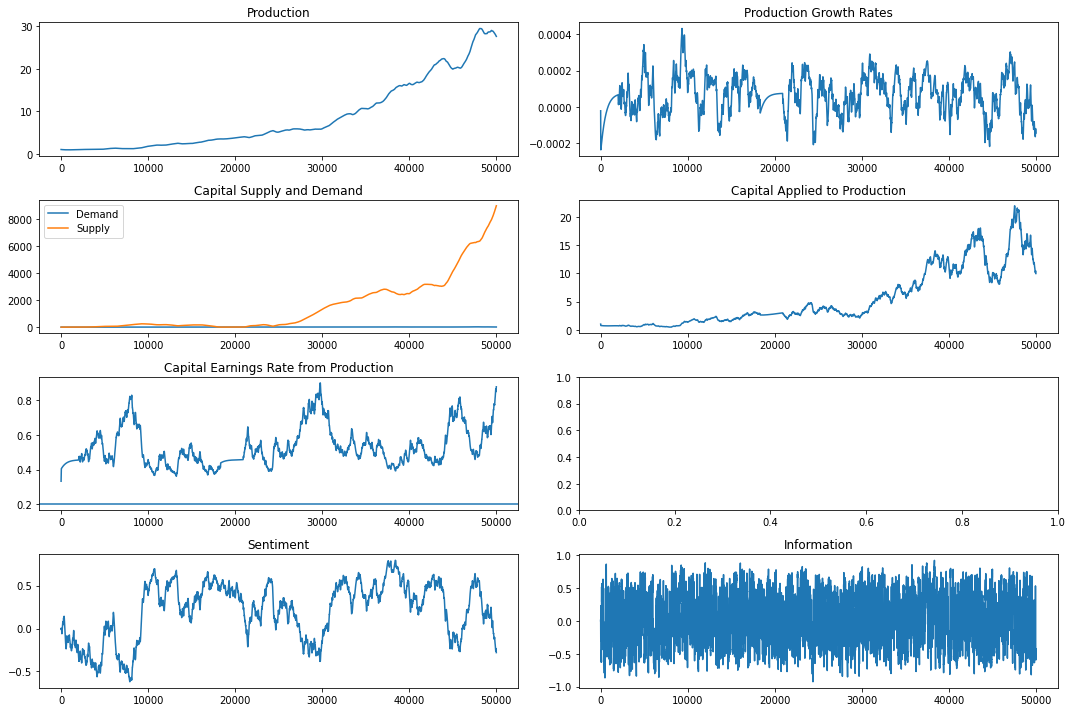

In [200]:
sm_k.visualise(save = 'solow_draft_K.png')

---
## Excess forcing

In [ ]:
# production, ks, kd, sentiment, information, tech, consumption
initial_values = {
    'y':1, 'ks':1, 'kd':0, 's':0, 'h':0, 'tech':1
}

capital_kwargs2 = {
    'static': False, 'depreciation': 0.3, 'pop_growth': pop_growth,
    'dynamic_kwargs': {
        'tau_s': tau_s, 'beta1': 1.1, 'beta2': 1.0, 
        'tau_h': tau_h, 'gamma': 2000, 
        'c1': 1, 'c2': 0.00015, 'c3': 0, 'c4':1e-1
        }
    } 

sm_force = SolowModel(hh_kwargs=hh_kwargs,
                firm_kwargs=firm_kwargs,
                capital_kwargs=capital_kwargs2,
                tech_rate=tech_rate,
                ou_kwargs=ou_kwargs,
                clearing_form='min',
                v_excess = True)

path = sm_force.solve(initial_values,t0=t0,t_end=t_end)

In [ ]:
sm_force.visualise(save='solow_r_force.png')

---
## Limiting case - the neo-classical Solow growth model (Kd>Ks)

In [190]:
# LIMITING CASE - Kd>Ks
initial_values = {
    'y':1, 'ks':1, 'kd':0, 's':0, 'h':0, 'tech':1
}

sm_ks = SolowModel(hh_kwargs=hh_kwargs,
                   firm_kwargs=firm_kwargs,
                   capital_kwargs=capital_kwargs,
                   tech_rate=tech_rate,
                   ou_kwargs=ou_kwargs,
                   clearing_form='ks',
                   v_excess = False
               )

path = sm_ks.solve(initial_values,t0=t0,t_end=t_end)

Successful: The solver successfully reached the end of the integration interval.


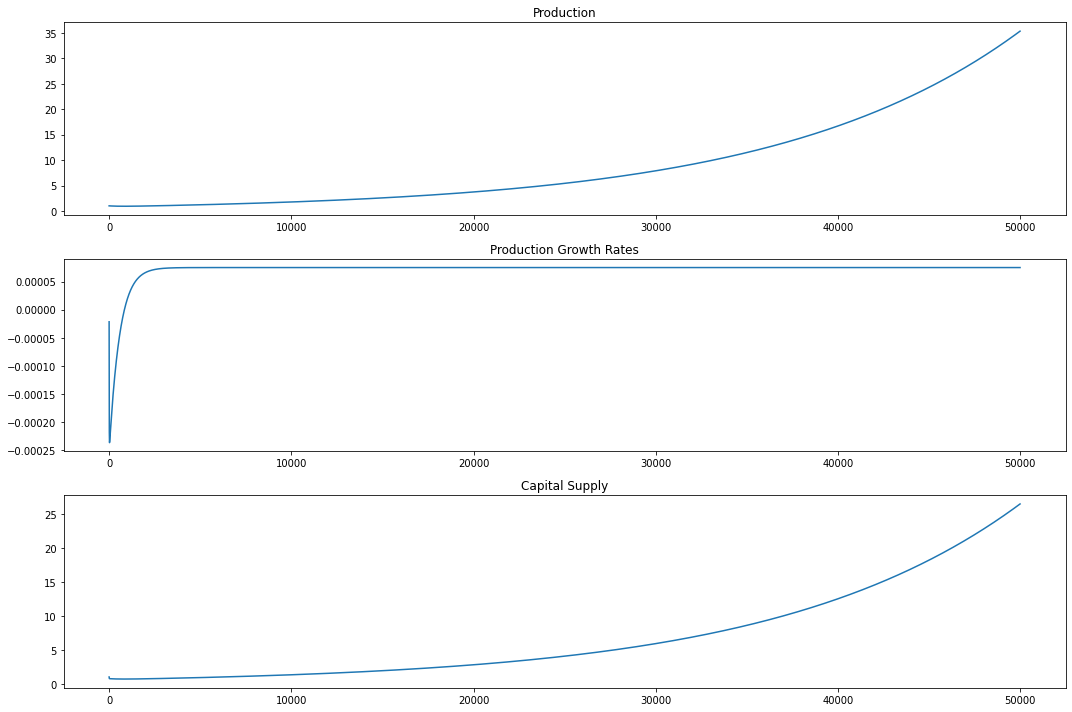

In [191]:
sm_ks.visualise(case = 'ks', save = 'solow_ks.png')

---
## Limiting case - the capital demand driven Solow growth model (Ks>Kd)

In [192]:
# LIMITING CASE - Ks>Kd
initial_values = {
    'y':1, 'ks':1, 'kd':0, 's':0, 'h':0, 'tech':1
}

sm_kd = SolowModel(hh_kwargs=hh_kwargs,
                   firm_kwargs=firm_kwargs,
                   capital_kwargs=capital_kwargs,
                   tech_rate=tech_rate,
                   ou_kwargs=ou_kwargs,
                   clearing_form='kd',
                   v_excess = False
               )

path = sm_kd.solve(initial_values,t0=t0,t_end=t_end)

Successful: The solver successfully reached the end of the integration interval.


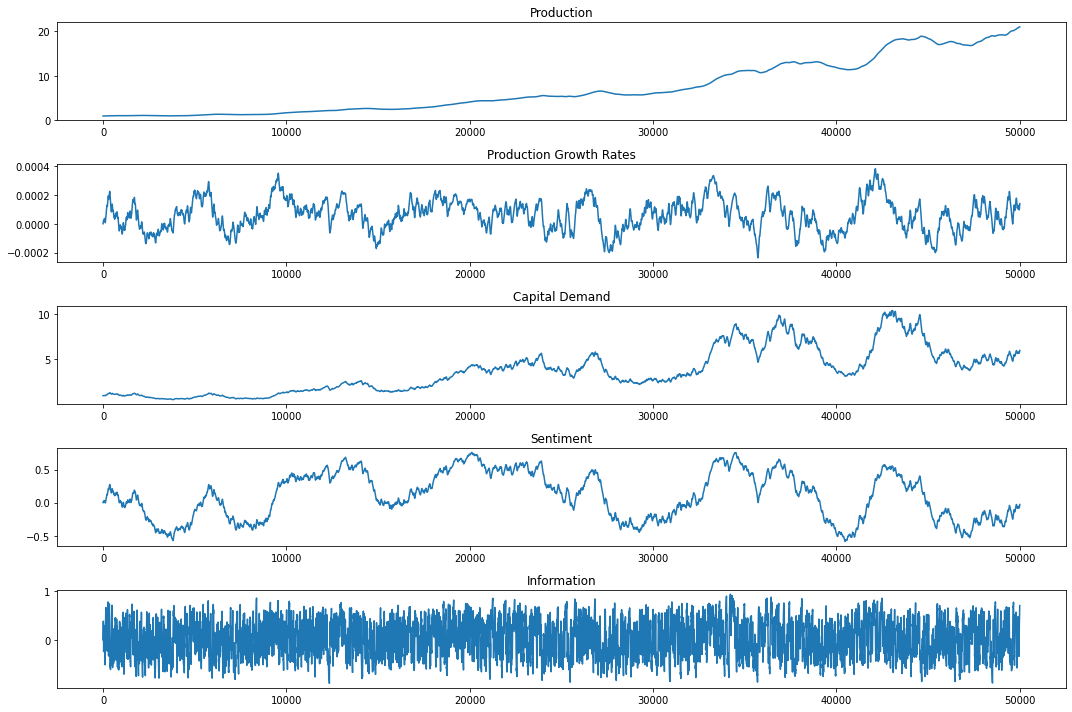

In [193]:
sm_kd.visualise(case='kd', save = 'solow_kd.png')